# Project 2: part2

## Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, StepFunction
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution

In [2]:
def plot_neuron_activity(net, ng_name, title, info_text=None):

    fig, axs = plt.subplots(3, 2, figsize=(18, 8), sharex=True)

    # Plot the membrane potential(voltage)
    axs[0, 0].plot(net[f"{ng_name}_rec", 0].variables["u"][:, :])
    axs[0, 0].axhline(y=net.NeuronGroups[0].behavior[5].init_kwargs['threshold'], color='red', linestyle='--', label=f"{ng_name} Threshold")
    axs[0, 0].set_xlabel('t')
    axs[0, 0].set_ylabel('U(t)')
    axs[0, 0].legend()
    axs[0, 0].set_title('Membrane Potential')

    # Plot the current
    axs[1, 0].plot(net[f"{ng_name}_rec", 0].variables["I"][:, :])
    axs[1, 0].set_xlabel('t')
    axs[1, 0].set_ylabel('I(t)')
    axs[1, 0].legend()
    axs[1, 0].set_title('Current')

    # Plot the raster plot
    spike_events = net[f"{ng_name}_event", 0].variables["spike"]
    spike_times = spike_events[:, 0]
    neuron_ids = spike_events[:, 1]
    axs[0, 1].scatter(spike_times, neuron_ids, s=5)
    axs[0, 1].set_xlabel('Time')
    axs[0, 1].set_ylabel('Neuron ID')
    axs[0, 1].legend()
    axs[0, 1].set_title('Raster Plot for LIF model')

    # Plot the activity
    axs[1, 1].plot(net[f"{ng_name}_rec", 0].variables["activity"])
    axs[1, 1].set_xlabel('Time')
    axs[1, 1].set_ylabel('activity')
    axs[1, 1].legend()
    axs[1, 1].set_title('Activity')

    # Additional subplot for text and information
    axs[2, 0].axis('off')  # Turn off the axis for this subplot
    axs[2, 1].axis('off')
    axs[2, 0].text(0.1, 0.5, info_text, bbox=dict(facecolor='white', alpha=0.5))

    fig.suptitle(title, fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()


def plot_weight_distribution(weight_matrix, bins=50, density=True):
    # Flatten the weight matrix into a 1D array
    weights_flat = weight_matrix.flatten()

    # Plot the distribution using a histogram
    plt.hist(weights_flat, bins=bins, density=density, alpha=0.7, color='b')
    plt.title('Weight Matrix Distribution')
    plt.xlabel('Weight Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



# Part 2: Implementing 3 synapses connectivity schemes

The 3 synapses connectivity schemes has been implemented in synapses model, here we just use and experiment them with examples.

We have experimented the fully connected scheme in the part1, based on the goal of this part, here we focus more in the synapse parameters. we begin with a simple one population synapse:

# 1- Fully connected synapses

## 1.1 Inside one neuron group synapse:
We saw the behavior of the population when there is no noise or randomness in neurons; Now we change parameters of synapse to see results. For example, we test the population with a low variance(5% of the weights), normal variance(25% of the weights), high variance(50% of the weights) and extremely high variance(100% of the weights).

### 1.1.1 Change in variance

#### 1.1.1 a) Low variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.05)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.1 b) normal variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.1 c) high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.1 d) extremely high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=1)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

As we see, beside the fact that all neurons are the same at the begining, when we increase the variance of weights, the time of spikes of neurons will be different.

### 1.1.2 Change in variance when neurons have different values in initial and noisy current:

What if we do the same when neurons are not the same at the begining? for example, the initial membrane potential of neurons are different and the constant current is noisy

#### 1.1.2 a) Low variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.05)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.2 b) normal variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.2 c) high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")


#### 1.1.2 d) extremely high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=1)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

### 1.1.3 Change in J0

Now let's play with the j0. We test it with low j0=5, normal j0=25 and high j0=35.

#### 1.1.3 a) Low j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.3 b) normal j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

#### 1.1.3 c) high j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)"
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=35, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "synapse inside one neuron group")

## 1.2 Synapse between two groups:
Now let's create a synapse between two groups of neurons. First, we test when there's no noise and all neurons begin with the same membrane potential. Now we change parameters of synapse to see results. For example, we test the population with a low variance(5% of the weights), normal variance(25% of the weights), high variance(50% of the weights) and extremely high variance(100% of the weights).

### 1.2.1 Change in variance

#### 1.2.1 a) low variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            # u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.05)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.1 b) normal variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            # u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.1 c) high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            # u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=1)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

As we see, postsynaptic neuron spike just whenever the presynaptic neurons spike.

### 1.2.2 Change in variance when neurons have different values in initial and noisy current:

#### 1.2.2 a) Low variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.05)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.2 b) normal variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.2 c) high variance for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            # u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

### 1.2.3 Change in j0

Now we fix the variance to a normal value(25%) and change the j0 for low=5, normal=25 and high=30.

#### 1.2.3 a) low j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=5, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.3 b) normal j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 1.2.3 c) high j0 for weights

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=50, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### corollary:
We learn that, either synapse in a single neuron group or synapse between two neuron groups, the lower variance causes that the spikes of postsynaptic neurons very depends on the spikes of presynaptic neurons. But, increasing the variance, causes that spike times vary more however they are around the spikes of presynaptic neurons.
Also adding noise to input current or having different initial membrane potential, causes the same impact.

Changing the j0,

# 2- Random coupling: Fixed coupling probability

Now expriment the random coupling with fixed coupling probability scheme for synapses. Because we've learnt the general imapct of j0 and variance, we focus in change in more specific parameters.

## 2.1 Inside one neuron group synapse:
Here we just experiment the different amount of p for two the situation not-noisy and noisy current and initial values.

### 2.1.1 change in p

#### 2.1.1 a) low p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.2)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")

#### 2.1.1 b) mid p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")

#### 2.1.1 c) high p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.8)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")

### 2.1.2 Change in p when neurons have different values in initial and noisy current:

#### 2.1.2 a) low p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noisy_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.2)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for inside-synapse neuron group")

#### 2.1.2 b) mid p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noisy_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for inside-synapse neuron group")

#### 2.1.2 c) high p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noisy_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)

syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.8)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for inside-synapse neuron group")

As we see, intrestingly, increasing p causes less randomness

We won't experiment different values for parameters j0 and variance since their impact are the same as previous section.

## 2.2 Synapse between two groups:
Now let's create a synapse between two groups of neurons. First, we test when there's no noise and all neurons begin with the same membrane potential. Now we change parameters of synapse to see results. For example, we test the population with a low amount of p=0.2, mid p=0.5 and high p=0.8

### 2.2.1 change in p

#### 2.2.1 a) low p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
                    net=net,
                    size=100,
                    behavior={
                        # 2: SetCurrent(value=100),
                        3: ConstantCurrent(value=7),
                        4: Dendrite(),
                        5: LIF(
                            tau=10,
                            u_rest=-65,
                            u_reset=-70,
                            threshold=-32,
                            R=5,
                            # u_init="normal(-60, 10)",
                        ),
                        7: ActivityRecorder(),
                        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
                        9: EventRecorder(variables=['spike'], tag="ng2_event")
                    }
                )
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.2)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 2.2.1 b) mid p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 2.2.1 c) high p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.9)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

### 2.2.2 Change in p when neurons have different values in initial and noisy current:

#### 2.2.2 a) low p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.2)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 2.2.2 b) mid p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.5)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

#### 2.2.2 b) high p

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedProbSynapse(j0=25, variance=0.25, p=0.8)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group")
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group")

# 3- Random coupling: Fixed number of presynaptic partners

Now expriment the random coupling with fixed number of presynaptic partners scheme for synapses. Because we've learnt the general imapct of j0 and variance, we focus in change in more specific parameters.

## 3.1 Inside one neuron group synapse:
Here we just experiment the different amount of p for two the situation not-noisy and noisy current and initial values.

### 3.1.1 change in n

#### 3.1.1 a) low n


In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=10)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

#### 3.1.1 b) mid n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=50)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

#### 3.1.1 c) high n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=90)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

### 3.1.2 Change in n when neurons have different values in initial and noisy current:

#### 3.1.2 a) low n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=10)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

#### 3.1.2 b) mid n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=50)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

#### 3.1.2 c) high n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=90)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for one inside-synapse neuron group")

## 3.2 Synapse between two groups:
Now let's create a synapse between two groups of neurons. First, we test when there's no noise and all neurons begin with the same membrane potential. Now we change parameters of synapse to see results. For example, we test the population with a low amount of n=10, mid p=50 and high p=90

### 3.2.1 change in n without noisy current

#### 3.2.1 a) low n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=10)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

#### 3.2.1 b) mid n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=50)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

#### 3.2.1 c) high n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            # u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=90)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

### 3.2.2 Change in n when neurons have different values in initial and noisy current:

#### 3.2.2 a) low n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=10)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

#### 3.2.2 a) mid n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=50)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

#### 3.2.2 a) high n

In [ ]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: ConstantCurrent(value=7,
                           noise_range=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: RandomConnectedFixedInputSynapse(j0=25, variance=0.25, n=50)})

net.initialize()
net.simulate_iterations(iterations=200)

In [ ]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptic neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)

# Noise Current

Now we experiment all parameters in these models we can test different schemes with noisy current like brownian noise current

# 1- Fully Connected scheme with noise current

In [20]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: NoisyCurrent(iterations=201,
                        mean=7,
                        std=2,
                        noise_type="brownian",
                        seed=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop1,
                   behavior={3: FullyConnectedSynapse(j0=25, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){3:NoisyCurrent(iterations=201,mean=7,std=2,noise_type=brownian,seed=1,)4:Dendrite()5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-32,R=5,u_init=normal(-60, 10),)7:ActivityRecorder()8:Recorder(variables=['u', 'I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)9:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_event,)}
SynapseGroup['All', 'SynapseGroup', 'syn', 'NeuronGroup_1 => NeuronGroup_1'](S100xD100){3:FullyConnectedSynapse(j0=25,variance=0.25,),}
200xBatch: 1/1 (100%) 198.832ms


198.83155822753906

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


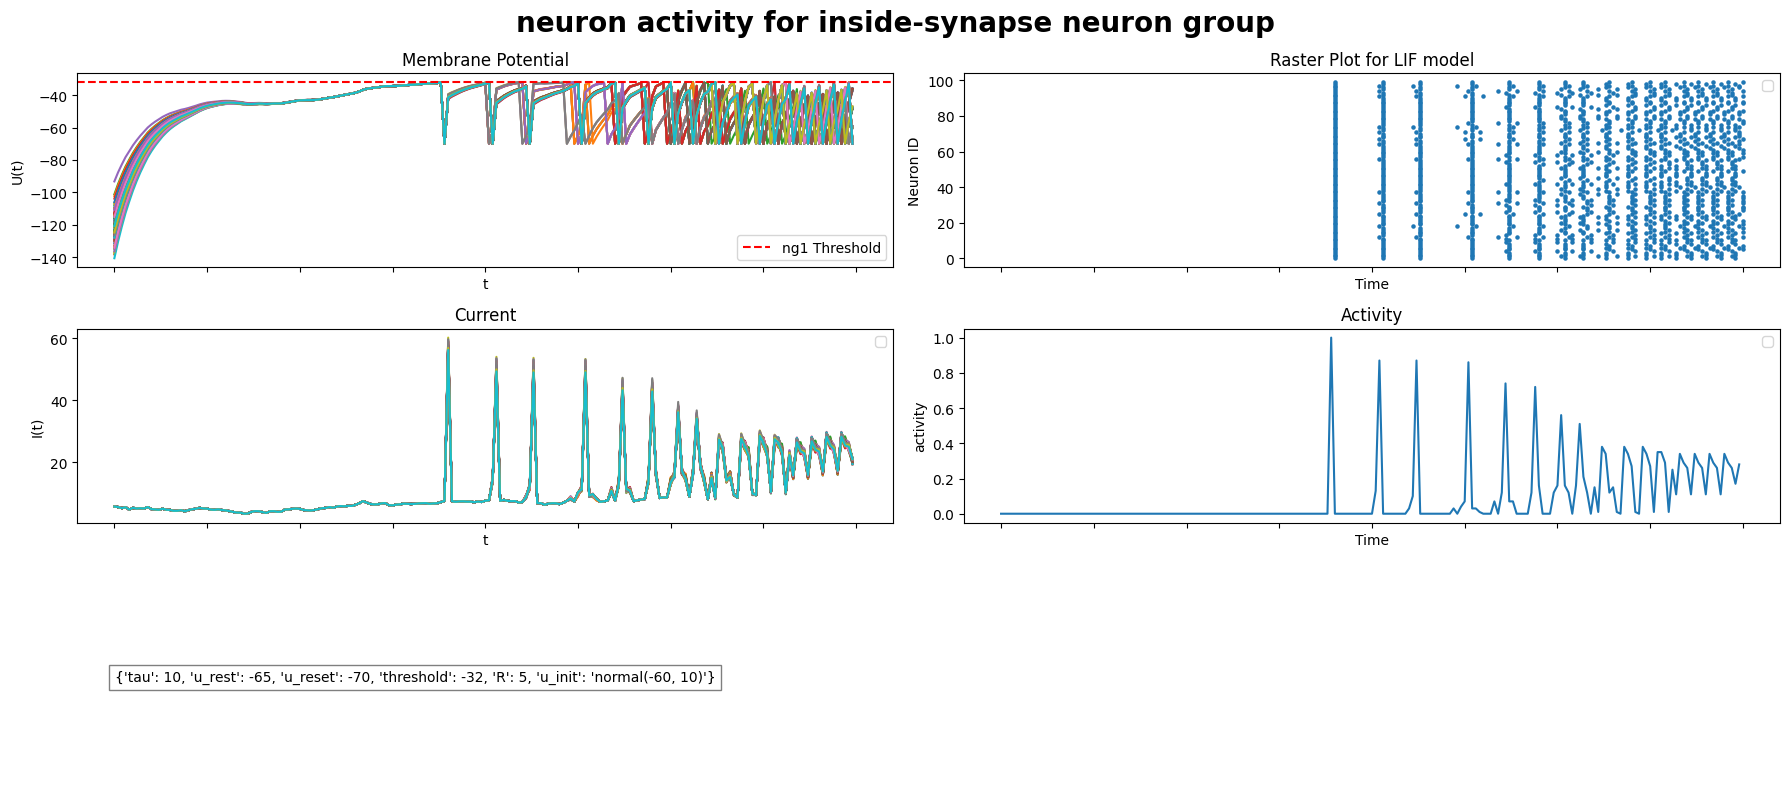

In [21]:
plot_neuron_activity(net, "ng1", "neuron activity for inside-synapse neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)

In [22]:
net = Network(behavior={1: TimeResolution(dt=1.0), })
pop1 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: NoisyCurrent(iterations=201,
                        mean=7,
                        std=2,
                        noise_type="brownian",
                        seed=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng1_rec"),
        9: EventRecorder(variables=['spike'], tag="ng1_event")
    }
)
pop2 = NeuronGroup(
    net=net,
    size=100,
    behavior={
        # 2: SetCurrent(value=100),
        3: NoisyCurrent(iterations=201,
                        mean=7,
                        std=2,
                        noise_type="brownian",
                        seed=1),
        4: Dendrite(),
        5: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-32,
            R=5,
            u_init="normal(-60, 10)",
        ),
        7: ActivityRecorder(),
        8: Recorder(variables=["u", "I", "activity"], tag="ng2_rec"),
        9: EventRecorder(variables=['spike'], tag="ng2_event")
    }
)
syn = SynapseGroup(net=net,
                   tag="All",
                   src=pop1,
                   dst=pop2,
                   behavior={3: FullyConnectedSynapse(j0=50, variance=0.25)})

net.initialize()
net.simulate_iterations(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(200)|2 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['NeuronGroup_1', 'NeuronGroup', 'ng'](100){3:NoisyCurrent(iterations=201,mean=7,std=2,noise_type=brownian,seed=1,)4:Dendrite()5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-32,R=5,u_init=normal(-60, 10),)7:ActivityRecorder()8:Recorder(variables=['u', 'I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_rec,)9:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng1_event,)}
NeuronGroup['NeuronGroup_2', 'NeuronGroup', 'ng'](100){3:NoisyCurrent(iterations=201,mean=7,std=2,noise_type=brownian,seed=1,)4:Dendrite()5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-32,R=5,u_init=normal(-60, 10),)7:ActivityRecorder()8:Recorder(variables=['u', 'I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng2_rec,)9:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng2_event

258.90326499938965

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


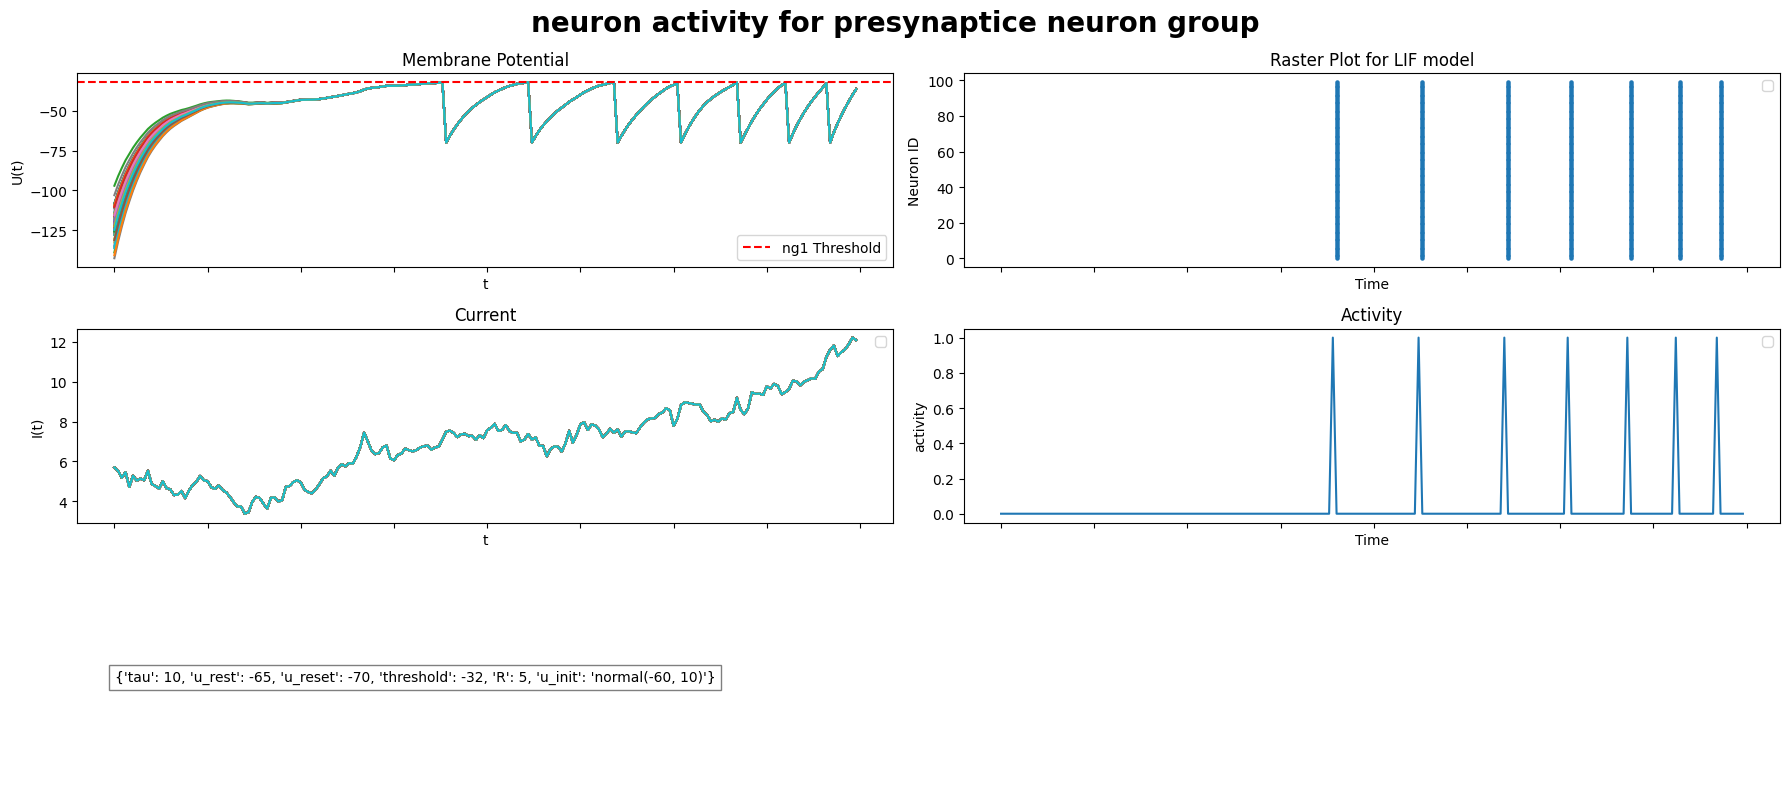

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


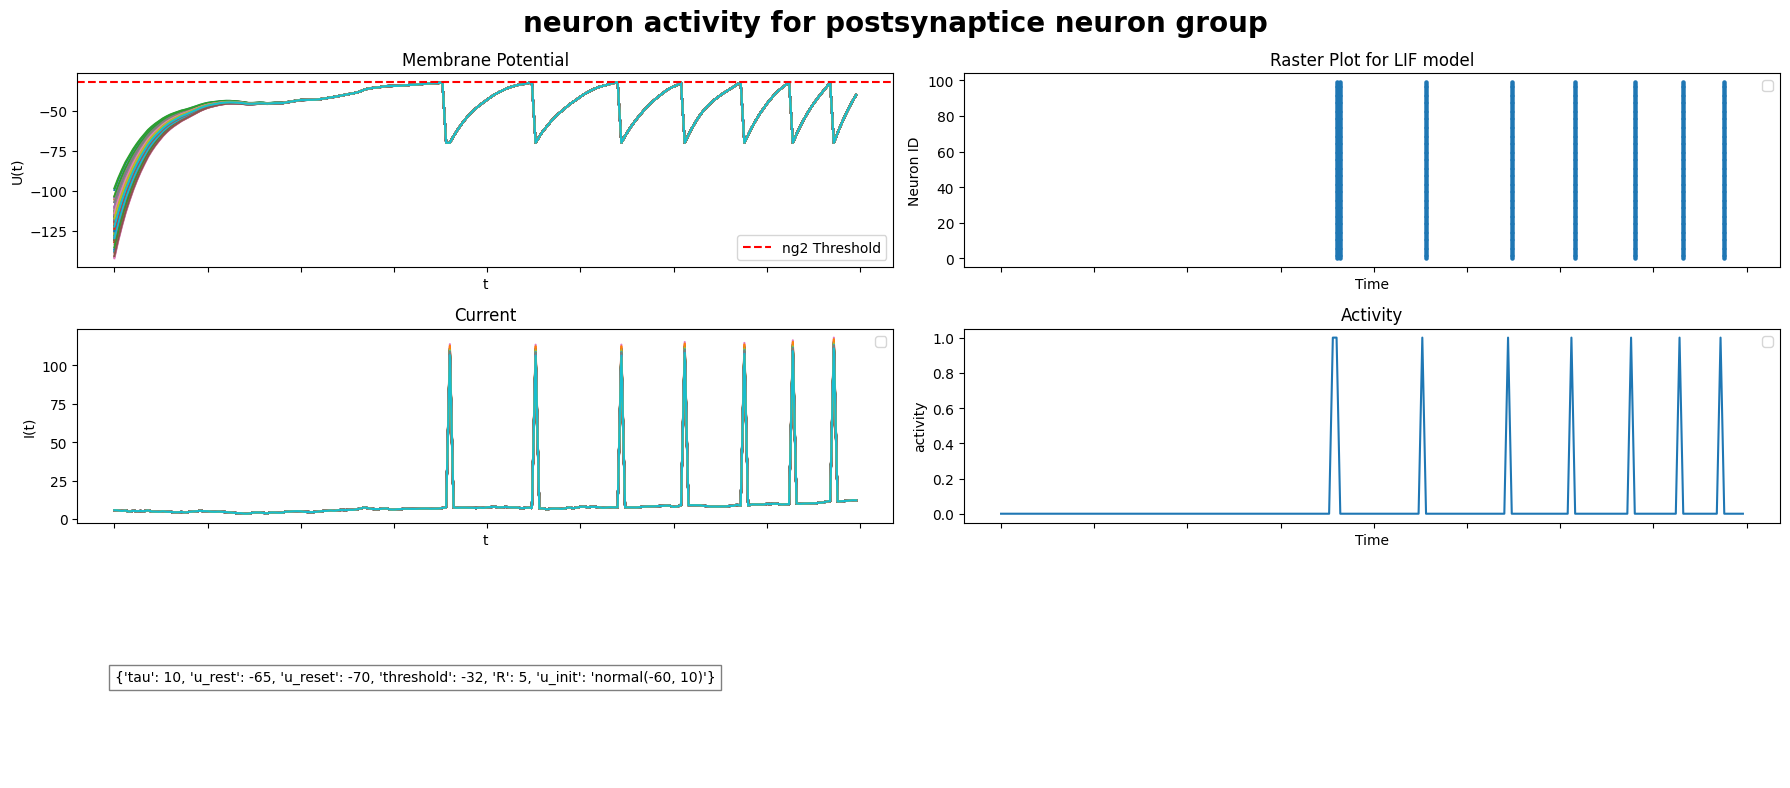

In [23]:
plot_neuron_activity(net, "ng1", "neuron activity for presynaptice neuron group", net.NeuronGroups[0].behavior[5].init_kwargs)
plot_neuron_activity(net, "ng2", "neuron activity for postsynaptice neuron group", net.NeuronGroups[1].behavior[5].init_kwargs)


# 2- Randomly